In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [231]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [232]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [233]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [234]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [235]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [236]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [237]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
final_theta_ne=[]
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    final_theta_ne.append(theta)
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [238]:
#final theta after applying NE
bias_ne=[]
bias_ne.append("Bias")
age_ne=[]
age_ne.append("Age")
bmi_ne=[]
bmi_ne.append("BMI")
children_ne=[]
children_ne.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING NE:-")    
for x in range(20): 
            bias_ne.append(final_theta_ne[x][0]) 
            age_ne.append(final_theta_ne[x][1])
            bmi_ne.append(final_theta_ne[x][2]) 
            children_ne.append(final_theta_ne[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_ne, age_ne, bmi_ne, children_ne):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING NE:-
Bias                 Age                  BMI                  Children
[0.01186528]         [0.30424489]         [0.17685316]         [0.04185705]
[-0.00827451]        [0.29380092]         [0.16583272]         [0.03328529]
[0.00102502]         [0.28487583]         [0.14692331]         [0.04942743]
[0.02472868]         [0.26706163]         [0.18861114]         [0.03488094]
[0.03623405]         [0.30004806]         [0.18633182]         [0.04207426]
[0.00042653]         [0.27458847]         [0.19011521]         [0.08705066]
[0.01255595]         [0.30281568]         [0.19492668]         [0.07402015]
[0.00685736]         [0.26740182]         [0.19886306]         [0.05464741]
[0.02227123]         [0.29817322]         [0.19308971]         [0.05131558]
[0.03002425]         [0.29205271]         [0.1594225]          [0.05986804]
[-0.01906709]        [0.28178842]         [0.12107137]         [0.05727214]
[-0.03202278]        [0.26949202]         [0.15

In [239]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [240]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
final_theta_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 5000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_gd[i], past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 500th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%500==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 500th iteration) for model number 1 :-

Training                                 Testing
1.4100236023686572                       1.4729871046604026
1.1351138895986495                       1.1675510982030344
1.0182581876337846                       1.0281516676779134
0.972705683915173                        0.9680435387158909
0.9557208056523864                       0.9423202169762049
0.9495001019981262                       0.9309719124511884
0.9472350630427293                       0.9257014246930814


Error values (every 500th iteration) for model number 2 :-

Training                                 Testing
1.5049353530007958                       1.4643146328366021
1.1620498889952844                       1.1452811436125643
1.0189663271554876                       1.0151010019673508
0.9650288728368128                       0.9674525895840318
0.9457288412282238                       0.9511786779985604
0.9389517020271096                       0.9459438570179984


Error values (every 500th iteration) for model number 16 :-

Training                                 Testing
1.4384201658894704                       1.391829403961967
1.129937471054863                        1.0942747791459744
1.0034812738491625                       0.9859293696110168
0.9565701507371551                       0.9543698474570165
0.9400301217643237                       0.9481986341912765
0.9343136889468338                       0.9489167413548449
0.9323506710922724                       0.9508222953735557


Error values (every 500th iteration) for model number 17 :-

Training                                 Testing
1.26852194088005                         1.2917495859774468
1.061863903274281                        1.0955592575244175
0.9784163155931784                       1.0137499969698949
0.9470646990424604                       0.9810315016630704
0.935663748161043                        0.9678969829607696
0.9315649444669881                       0.9624419472357494

In [241]:
#final theta after applying GD
bias_gd=[]
bias_gd.append("Bias")
age_gd=[]
age_gd.append("Age")
bmi_gd=[]
bmi_gd.append("BMI")
children_gd=[]
children_gd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING GD:-")    
for x in range(20): 
            bias_gd.append(final_theta_gd[x][0]) 
            age_gd.append(final_theta_gd[x][1])
            bmi_gd.append(final_theta_gd[x][2]) 
            children_gd.append(final_theta_gd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_gd, age_gd, bmi_gd, children_gd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))         


FINAL THETA OF 20 MODELS AFTER APPLYING GD:-
Bias                 Age                  BMI                  Children
[0.03767914]         [0.32117396]         [0.17997372]         [0.04571549]
[0.01769077]         [0.29751984]         [0.1807191]          [0.03720435]
[0.00829438]         [0.31436734]         [0.14217362]         [0.05785487]
[0.0526244]          [0.26343542]         [0.19542534]         [0.04741797]
[0.05149894]         [0.31778923]         [0.20330804]         [0.04156204]
[0.00308289]         [0.27129513]         [0.19438541]         [0.11842926]
[0.01962739]         [0.28990248]         [0.21700848]         [0.09579831]
[0.02300628]         [0.2713031]          [0.19004398]         [0.07972042]
[0.04792668]         [0.31313144]         [0.19475349]         [0.06310625]
[0.05940636]         [0.29877051]         [0.15444952]         [0.06947867]
[-0.00251852]        [0.27352016]         [0.11991893]         [0.08455922]
[-0.01040813]        [0.27895308]         [0.17

Model number  1 :


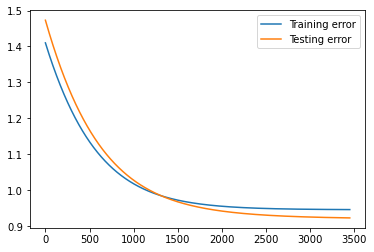

Model number  2 :


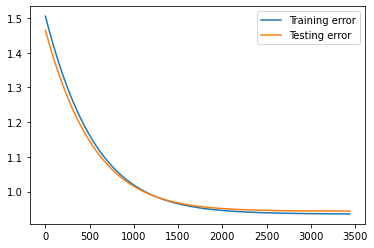

Model number  3 :


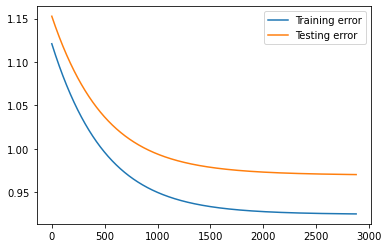

Model number  4 :


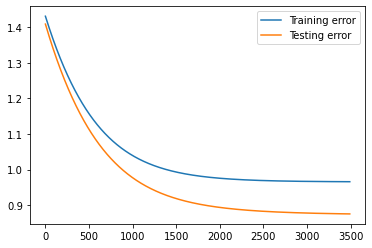

Model number  5 :


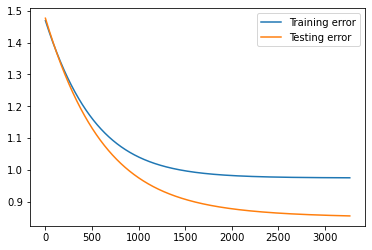

Model number  6 :


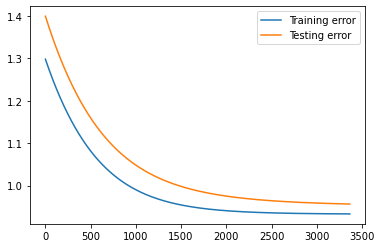

Model number  7 :


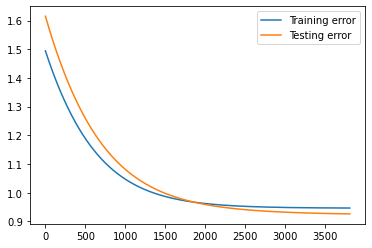

Model number  8 :


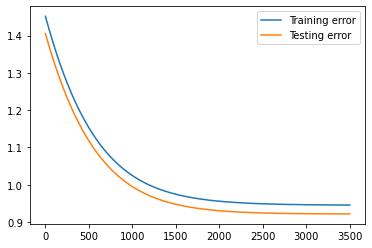

Model number  9 :


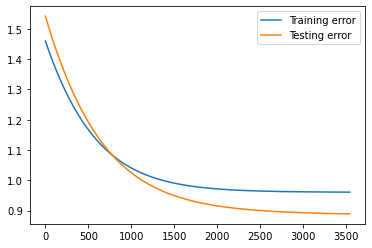

Model number  10 :


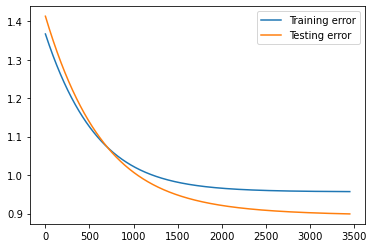

Model number  11 :


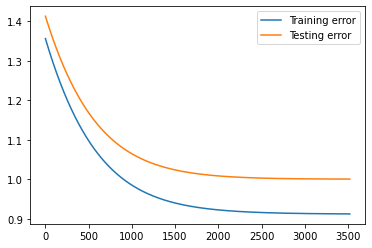

Model number  12 :


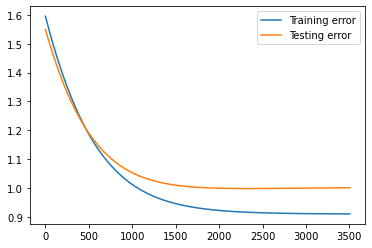

Model number  13 :


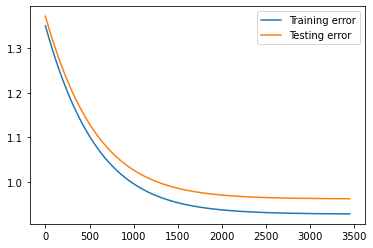

Model number  14 :


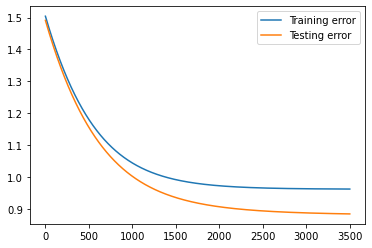

Model number  15 :


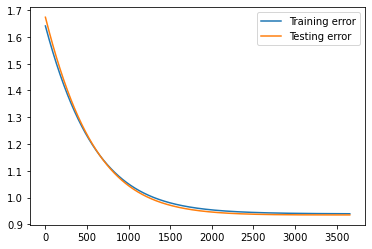

Model number  16 :


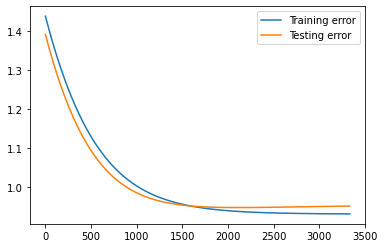

Model number  17 :


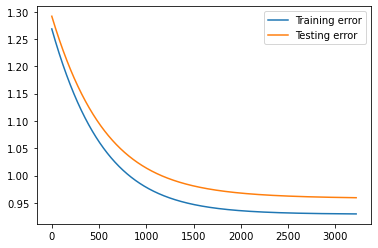

Model number  18 :


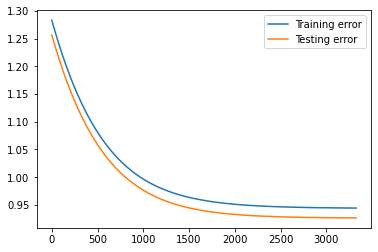

Model number  19 :


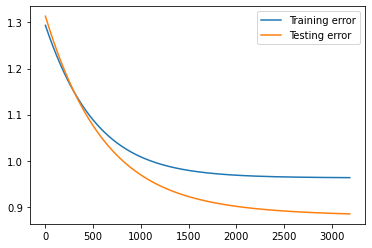

Model number  20 :


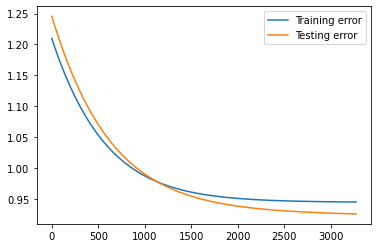

In [242]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

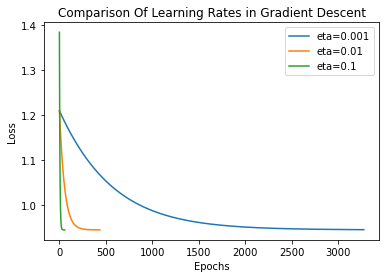

In [243]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.01
eta3=0.1

final_theta2_gd, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3_gd, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.figure()
plt.title('Comparison Of Learning Rates in Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_grad_desc[19], label='eta=0.001')
plt.plot(past_rmse_train_grad_desc2, label='eta=0.01')
plt.plot(past_rmse_train_grad_desc3, label='eta=0.1')
plt.legend()

In [244]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        p = np.random.permutation(len(x))
        x=x[p] 
        y=y[p]
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [245]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_sgd = [None]*20
past_costs_test_sgd = [None]*20
final_theta_sgd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 400
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta_sgd[i], past_costs_train_sgd[i], past_costs_test_sgd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.0282798512993523                       1.0298078889448126


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
1.0500242029414313                       1.0521347202328202


Error values (every 50th iteration) for model number 3 :-

Training                                 Testing
1.0079421983668608                       1.0432137380441784


Error values (every 50th iteration) for model number 4 :-

Training                                 Testing
0.974360736530914                        0.8761444473273717
0.9654328656324167                       0.8741791157704032


Error values (every 50th iteration) for model number 5 :-

Training                                 Testing
1.0595005619610698                       0.9685446704536343


Error values (every 50th iteration) for model number 6 :-

Training                       

In [246]:
#final theta after applying SGD
bias_sgd=[]
bias_sgd.append("Bias")
age_sgd=[]
age_sgd.append("Age")
bmi_sgd=[]
bmi_sgd.append("BMI")
children_sgd=[]
children_sgd.append("Children")
print("FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-")    
for x in range(20): 
            bias_sgd.append(final_theta_sgd[x][0]) 
            age_sgd.append(final_theta_sgd[x][1])
            bmi_sgd.append(final_theta_sgd[x][2]) 
            children_sgd.append(final_theta_sgd[x][3])
            
    
for c1, c2, c3, c4 in zip(bias_sgd, age_sgd, bmi_sgd, children_sgd):
        print ("%-20s %-20s %-20s %s" % (c1, c2, c3, c4))    

FINAL THETA OF 20 MODELS AFTER APPLYING SGD:-
Bias                 Age                  BMI                  Children
[[0.00481006]]       [[0.30395246]]       [[0.17706707]]       [[0.04227223]]
[[-0.00973047]]      [[0.29507315]]       [[0.17385434]]       [[0.03467672]]
[[0.00703971]]       [[0.28861507]]       [[0.15011497]]       [[0.04768985]]
[[0.03282904]]       [[0.27938272]]       [[0.19087895]]       [[0.03217807]]
[[0.03706933]]       [[0.29454934]]       [[0.1811532]]        [[0.03764556]]
[[0.00280373]]       [[0.2690621]]        [[0.19507709]]       [[0.08895834]]
[[0.01229574]]       [[0.29433364]]       [[0.18366095]]       [[0.0735406]]
[[0.01115827]]       [[0.2678778]]        [[0.20551061]]       [[0.05574947]]
[[0.02374094]]       [[0.30525763]]       [[0.20174917]]       [[0.05171674]]
[[0.02481642]]       [[0.29207614]]       [[0.1621771]]        [[0.06228829]]
[[-0.02511043]]      [[0.28518168]]       [[0.11962938]]       [[0.0568381]]
[[-0.03648726]]      [[0.2

Model number  1 :


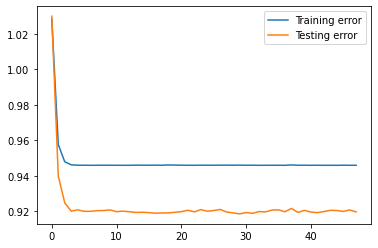

Model number  2 :


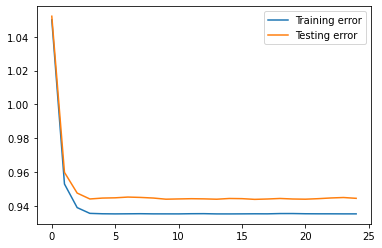

Model number  3 :


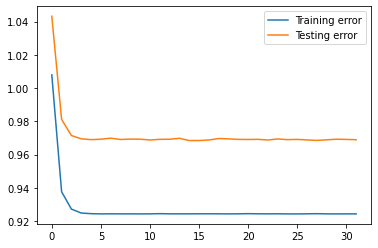

Model number  4 :


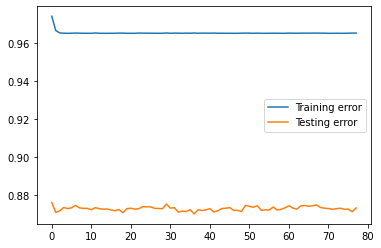

Model number  5 :


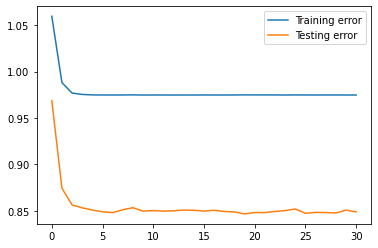

Model number  6 :


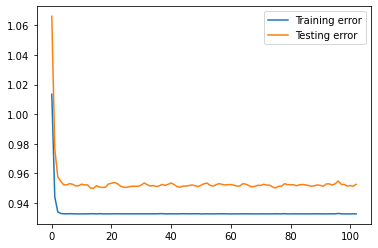

Model number  7 :


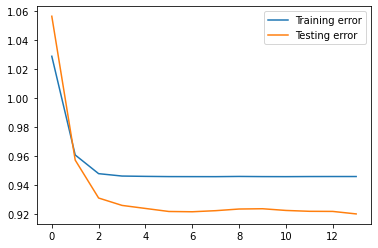

Model number  8 :


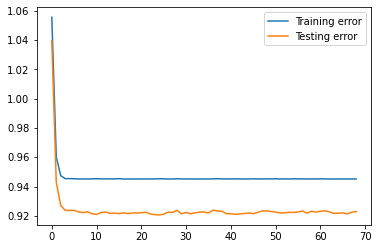

Model number  9 :


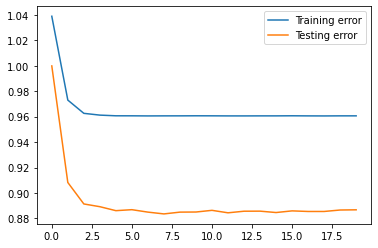

Model number  10 :


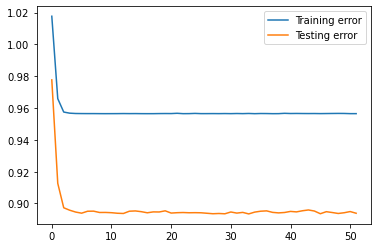

Model number  11 :


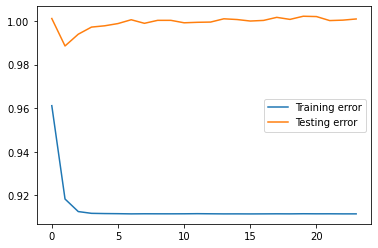

Model number  12 :


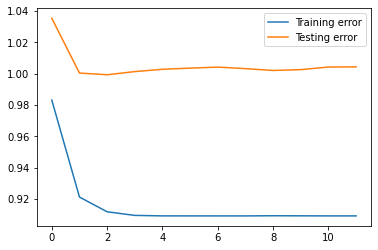

Model number  13 :


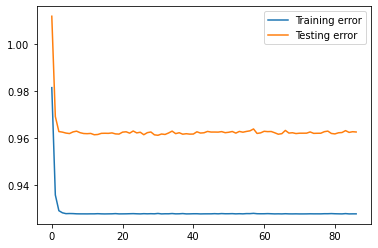

Model number  14 :


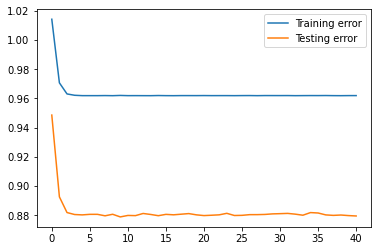

Model number  15 :


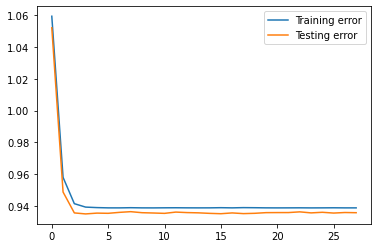

Model number  16 :


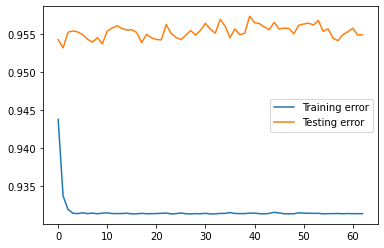

Model number  17 :


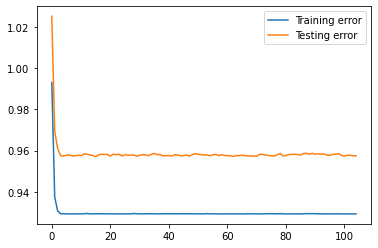

Model number  18 :


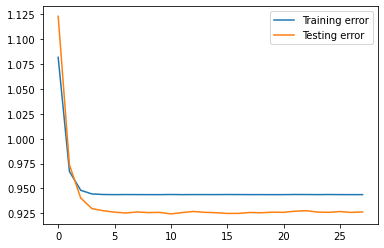

Model number  19 :


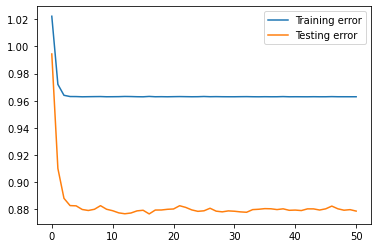

Model number  20 :


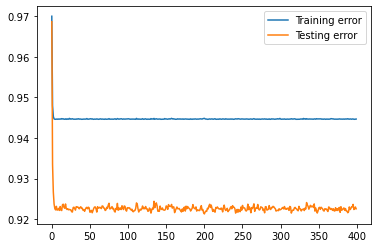

In [247]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

In [253]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.01
eta3=0.1

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd2 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)



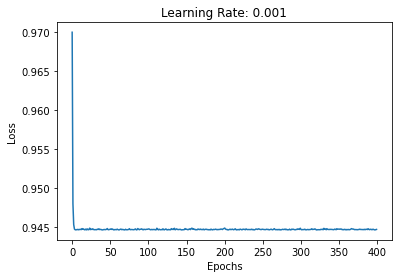

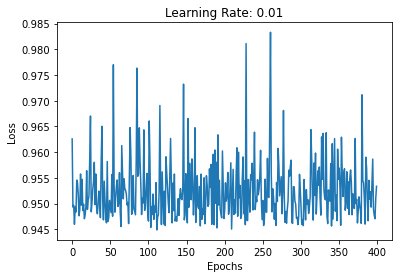

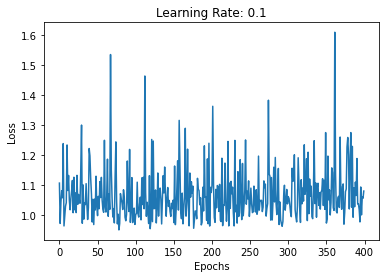

In [254]:
plt.figure()
plt.title('Learning Rate: 0.001')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd[19])
plt.figure()
plt.title('Learning Rate: 0.01')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd2)
plt.figure()
plt.title('Learning Rate: 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(past_rmse_train_sgd3)

In [250]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.945940,0.946461,0.945966,0.920037,0.923296,0.919725
2,0.935297,0.935809,0.935336,0.944474,0.944102,0.944520
3,0.924291,0.924831,0.924326,0.969015,0.970164,0.968933
4,0.965356,0.965872,0.965475,0.872495,0.875412,0.873307
5,0.974682,0.975151,0.974726,0.849552,0.855277,0.848977
6,0.932717,0.933258,0.932747,0.952013,0.956526,0.952667
7,0.945846,0.946419,0.945956,0.922159,0.925908,0.920130
8,0.945123,0.945647,0.945158,0.922034,0.921923,0.922896
9,0.960539,0.961065,0.960611,0.885106,0.889260,0.886820
10,0.956464,0.956993,0.956486,0.894421,0.898957,0.893854


In [251]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,5
GD,0,6
SGD,0,9


In [252]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.942350,0.927751
GD,0.942879,0.929596
SGD,0.942394,0.927739


,Training variance error,Testing variance error
NE,0.000315,0.001753
GD,0.000315,0.001596
SGD,0.000316,0.001769
